# importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv("E:\Data Trained\Project 7\Baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
data.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
data.shape

(30, 17)

In [8]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [14]:
a=data.corr()
a

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [10]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

### checking for outliers

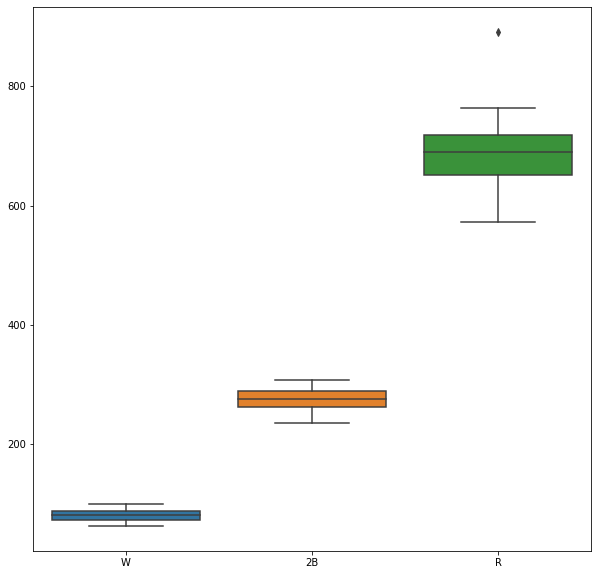

In [17]:
sns.boxplot(data=data[['W','2B','R']])
fig=plt.gcf()
fig.set_size_inches(10,10)

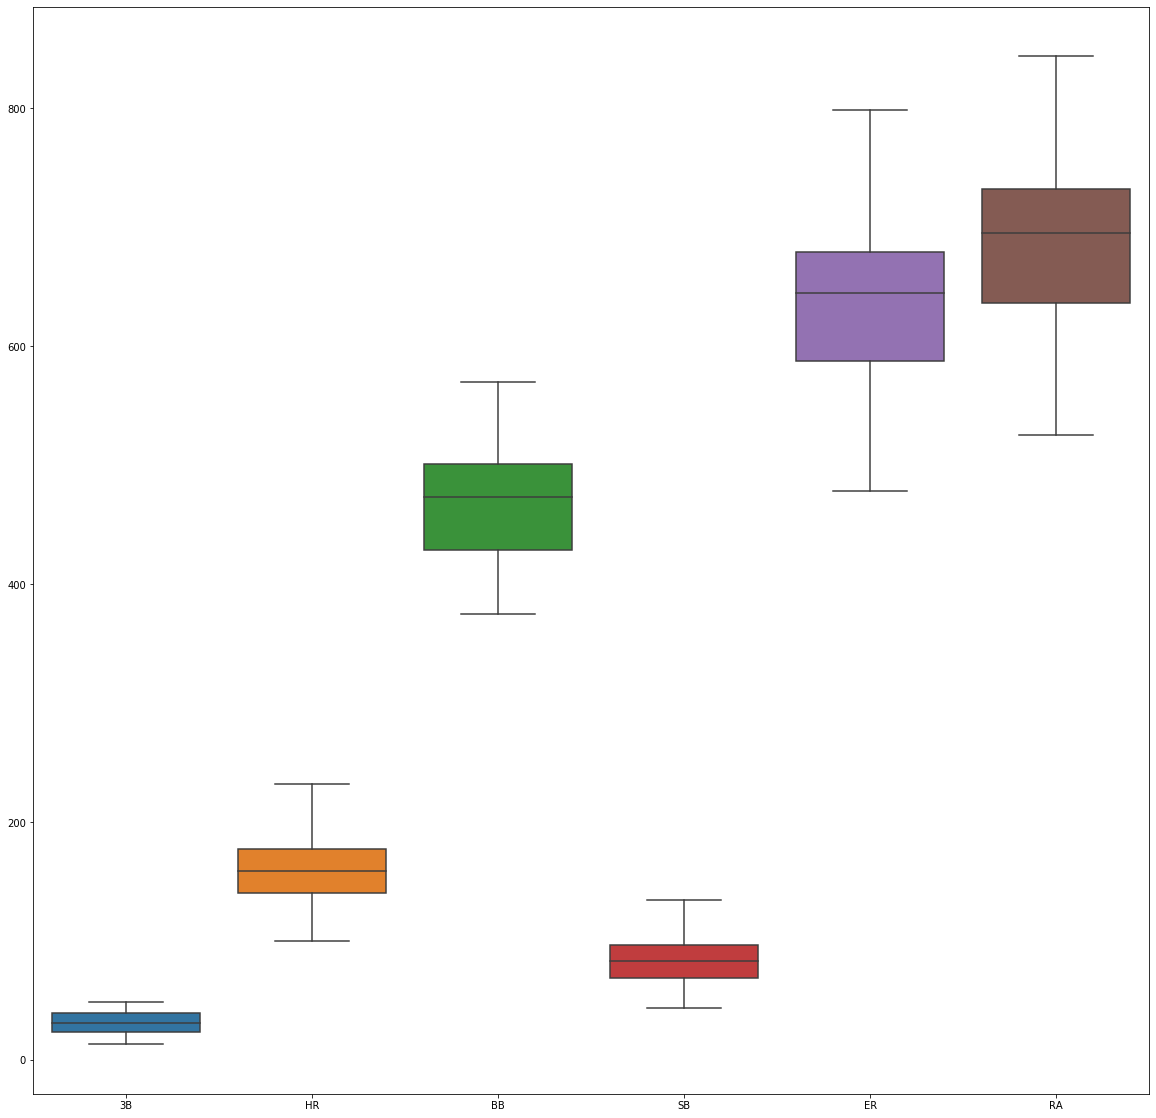

In [28]:
sns.boxplot(data=data[['3B','HR','BB','SB','ER','RA']])
fig=plt.gcf()
fig.set_size_inches(20,20)

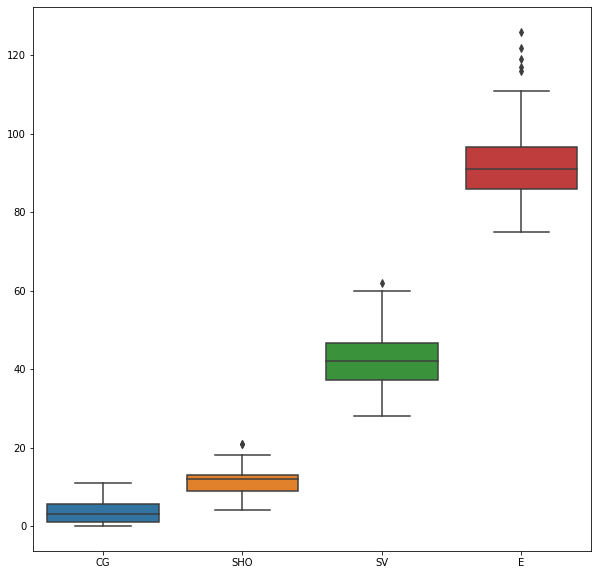

In [24]:
sns.boxplot(data=data[['CG','SHO','SV','E']])
fig=plt.gcf()
fig.set_size_inches(10,10)

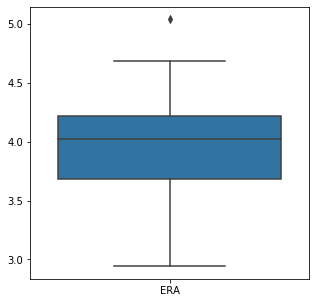

In [23]:
sns.boxplot(data=data[['ERA']])
fig=plt.gcf()
fig.set_size_inches(5,5)

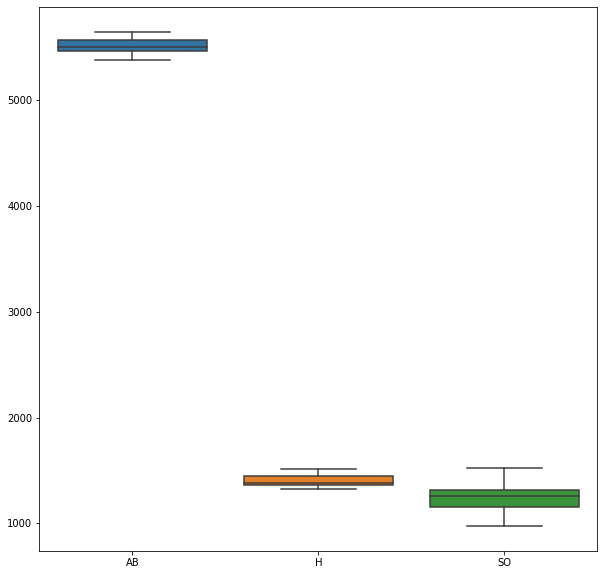

In [34]:
sns.boxplot(data=data[['AB','H','SO']])
fig=plt.gcf()
fig.set_size_inches(10,10)

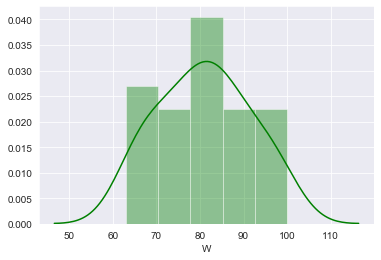

In [38]:
sns.set_style('darkgrid')
sns.distplot(data['W'],color='green')
plt.show()

In [42]:
datan=['R','AB','H','2B','3B','HR','BB','SO']
k=data[datan]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B413F8E10>,
      dtype=object)

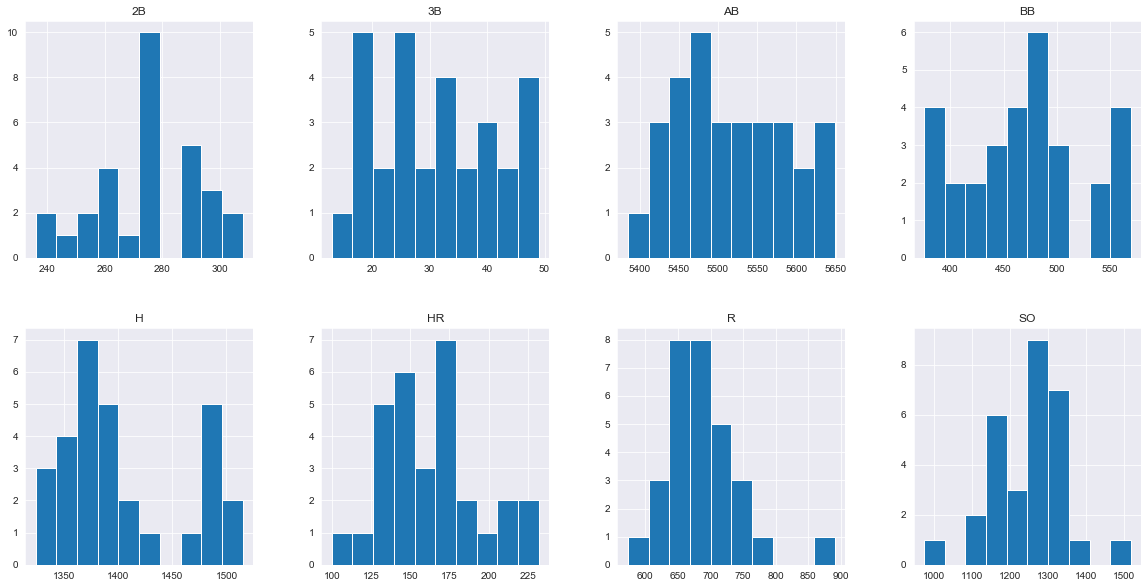

In [43]:
k.hist(figsize=(20,10), grid="True", layout=(2, 4), bins = 10)

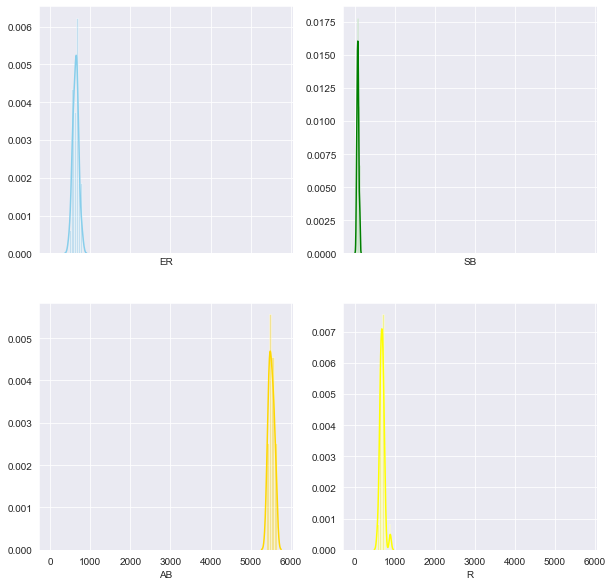

In [47]:
f,axes=plt.subplots(2,2,figsize=(10, 10),sharex=True)
sns.distplot( data["ER"],color="skyblue",ax=axes[0,0])
sns.distplot( data["SB"],color="green",ax=axes[0,1])
sns.distplot( data["AB"],color="gold",ax=axes[1,0])
sns.distplot( data["R"],color="yellow",ax=axes[1,1])

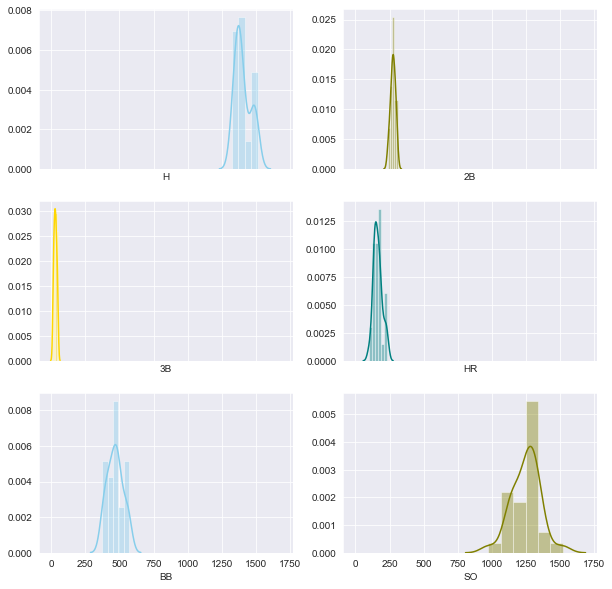

In [49]:
f,axes=plt.subplots(3, 2,figsize=(10, 10),sharex=True)
sns.distplot(data["H"],color="skyblue",ax=axes[0, 0])
sns.distplot(data["2B"],color="olive",ax=axes[0, 1])
sns.distplot(data["3B"],color="gold",ax=axes[1, 0])
sns.distplot(data["HR"],color="teal",ax=axes[1, 1])
sns.distplot(data["BB"],color="skyblue",ax=axes[2, 0])
sns.distplot(data["SO"],color="olive",ax=axes[2, 1])

Bivariate Analysis

In [50]:
a

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


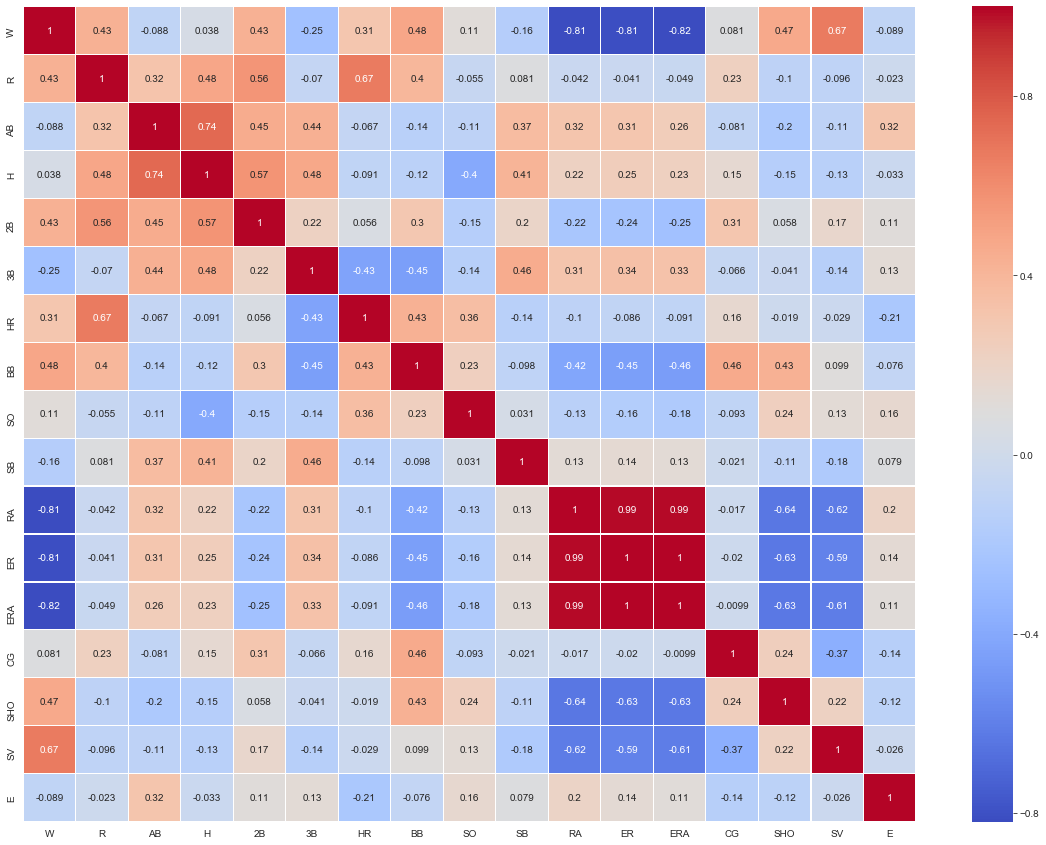

In [52]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap ='coolwarm',linecolor='white', linewidths=0.1,annot=True)
plt.show()

In [54]:
x = data.drop(['W'],axis=1)
y = data.W

In [55]:
x.shape

(30, 16)

In [58]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [59]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size = .20)

In [63]:
!pip install mlxtend

In [65]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()

In [67]:
sfs1=sfs(lr,k_features=10,forward=False,verbose=1,scoring='neg_mean_squared_error')

In [68]:
sfs1=sfs1.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.9s finished
Features: 15/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished
Features: 14/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished
Features: 13/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
Features: 12/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.4s finished
Features: 11/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished
Features: 10/10

In [69]:
features=list(sfs1.k_feature_names_)

In [71]:
print(features)

['R', '2B', 'HR', 'BB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV']


#from here we can see out of 10 features 3 features are highly correlated so we remove ER and ERA

In [73]:
x = x[features]

In [74]:
x.drop(['ER','ERA'],axis=1)

,R,2B,HR,BB,RA,CG,SHO,SV
0,724,300,139,383,641,2,8,56
1,696,277,156,439,700,2,12,45
2,669,303,141,533,640,11,10,38
3,622,260,136,404,701,7,9,37
4,689,289,151,455,803,7,12,35
5,891,308,232,570,670,7,10,34
6,764,272,212,554,698,3,4,48
7,713,246,217,418,693,0,10,43
8,644,278,167,436,642,1,12,60
9,748,294,161,478,753,3,10,40


In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size = .20)

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24, 10)
(24,)
(6, 10)
(6,)


# Linear Regresison

In [77]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [78]:
Linearmodel = linear_model.LinearRegression()
Linearmodel.fit(x_train, y_train)
print(r2_score(y_train, Linearmodel.predict(x_train)))
print(mean_squared_error(y_train, Linearmodel.predict(x_train)))

0.9501673250616248
4.817072062315614


In [79]:
print(r2_score(y_test,Linearmodel.predict(x_test)))
print(mean_squared_error(y_test,Linearmodel.predict(x_test)))

0.9151448147950276
11.955152759989447


# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [81]:
print(r2_score(y_train,dt.predict(x_train)))
print(mean_squared_error(y_train,dt.predict(x_train)))

1.0
0.0


In [82]:
print(r2_score(y_test,dt.predict(x_test)))
print(mean_squared_error(y_test,dt.predict(x_test)))

0.513801261829653
68.5


# Random Forest

In [83]:
random_model = RandomForestRegressor()
random_model.fit(x_train, y_train)
print(r2_score(y_train, random_model.predict(x_train)))
print(mean_squared_error(y_train,random_model.predict(x_train)))

C:\Users\RAJSHREE\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9006878715494172
9.599999999999996


In [84]:
print(r2_score(y_test, random_model.predict(x_test)))
print(mean_squared_error(y_test,random_model.predict(x_test)))

0.6027839116719245
55.96333333333331


# Hyperparameter tuning and cross validaing before selecting final model

In [85]:
from sklearn.model_selection import GridSearchCV

In [87]:
params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200]}
grid_search_rf = GridSearchCV(random_model, params, cv = 3)

In [88]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20, 25, No

In [89]:
print(r2_score(y_train, grid_search_rf.predict(x_train)))
print(mean_squared_error(y_train,grid_search_rf.predict(x_train)))

0.9292854049821297
6.835621416666658


In [90]:
print(r2_score(y_test, grid_search_rf.predict(x_test)))
print(mean_squared_error(y_test,grid_search_rf.predict(x_test)))

0.6333018540419322
51.66369434164778


In [91]:
random_model.fit(x_train, y_train)
print(r2_score(y_train, random_model.predict(x_train)))
print(mean_squared_error(y_train,random_model.predict(x_train)))

0.919632177302035
7.768749999999996


In [92]:
print(r2_score(y_test, random_model.predict(x_test)))
print(mean_squared_error(y_test,grid_search_rf.predict(x_test)))

0.6441285488958992
51.66369434164778


As we can see from the r2 value and mean squared error linear regression perform best in the given scenario followed by random forest and decision tree perform least in test dataset. One possible reason for random forest not performing better than linear regression is that the training dataset is small and linear regression was able to better fit the regression line.

As a result selecting linear regression model as best model.

In [93]:
from sklearn.externals import joblib
joblib.dump(grid_search_rf,'baseball.pk1')

C:\Users\RAJSHREE\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['baseball.pk1']